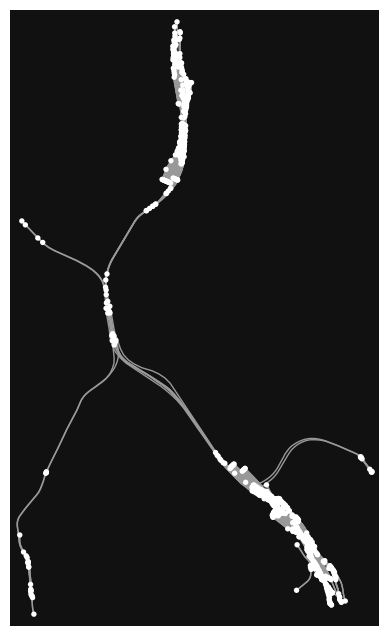

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [37]:
## We can easily improve the performance of localization by using prior-map as we know the train is moving along the track

import osmnx as ox

# Define your area of interest
place_name = "Paris, France"

# Custom filter for railway tracks
custom_filter = '["railway"~"rail"]'

# Download the railway network
railway_network = ox.graph_from_place(place_name, custom_filter=custom_filter)

# Project the network to an appropriate local CRS (optional but recommended for accuracy)
railway_network_projected = ox.project_graph(railway_network,to_crs='EPSG:3857')

# Visualize the railway network
ox.plot_graph(railway_network_projected)



In [38]:
ox.utils_graph.graph_to_gdfs(railway_network_projected, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)

(                        y             x  street_count       lon        lat  \
 osmid                                                                        
 1309648897   2.886472e+06  3.763678e+06             3  2.395768  48.832366   
 1311820038   2.886451e+06  3.763687e+06             3  2.395919  48.832189   
 1309648867   2.886505e+06  3.763659e+06             4  2.395466  48.832647   
 1311849530   2.886095e+06  3.763770e+06             3  2.397536  48.829080   
 1871441925   2.894025e+06  3.761366e+06             3  2.353972  48.897742   
 ...                   ...           ...           ...       ...        ...   
 6279163748   2.887892e+06  3.759526e+06             3  2.337505  48.841201   
 10110267184  2.893234e+06  3.761436e+06             1  2.356018  48.890736   
 871917439    2.892125e+06  3.761230e+06             1  2.354763  48.880629   
 1309648803   2.886450e+06  3.763698e+06             3  2.396060  48.832192   
 1309648816   2.886484e+06  3.763677e+06            

In [39]:
import osmnx as ox
import folium

# Assuming 'G' is your OSMnx graph
G = railway_network_projected  # Wrap the graph variable in a list

# Convert the graph to GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)  # Access the graph object from the list

# Create a Folium map. You might need to adjust the location and zoom_start for your specific case
location = gdf_nodes.unary_union.centroid.coords[0][::-1]  # Gets the centroid of the graph
m = folium.Map(location=location, zoom_start=15,crs= 'EPSG3857')

# Add railway lines (edges) to the map
for _, row in gdf_edges.iterrows():
    pline = folium.PolyLine(locations=[(y, x) for x, y in row.geometry.coords], weight=2, color='blue',crs= 'EPSG3857')
    pline.add_to(m)

# Display the map
m


In [35]:
location

(2889353.0493740076, 3762281.02087065)

In [15]:
gdf.bbox_north[0]

48.902156

In [12]:
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((2.22412 48.85420, 2.22412 48.85402, ...",48.902156,48.815576,2.46976,2.224122,82297359,relation,71525,48.853495,2.348391,boundary,administrative,12,0.83171,city,Paris,"Paris, Ile-de-France, Metropolitan France, France"
